# Demo:  Polynomial Model Order Selection

In this demo, we will illustrate the process of cross-validation for model order selection.  We demonstrate the concepts via  polynomial fitting using synthetic dat.  The lab will demonstrate how to:
* Characterize the model order for a simple polynomial model
* Measure training and test error for a given model order
* Select a suitable model order using cross-validation
* Plot the results for the model order selection process

We first load the packages as usual.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Polynomial Data

To illustrate the concepts, we consider a simple polynomial model:
$$
   y = \beta_0 + \beta_1 x + \cdots + \beta_d x^d + \epsilon,
$$
where $d$ is the polynomial degree.  We first generate *synthetic* data for this model.  Sythetic data means that the data was generated artifically (e.g. by a computer program) instead of being actually measured.    

In [2]:
# Import useful polynomial library
import numpy.polynomial.polynomial as poly

# Prepare for random number generation
rng = np.random.default_rng() # https://numpy.org/doc/stable/reference/random/generator.html

# True model parameters
beta = np.array([1,0.5,0,2])   # coefficients
wstd = 0.4                     # noise std
dtrue = len(beta)-1            # true poly degree

# Generate independent data
nsamp = 100
xdat = rng.uniform(-1,1,nsamp)

# Polynomial plus random noise
y0 = poly.polyval(xdat,beta)
ydat = y0 + rng.normal(0,wstd,nsamp)

We can now visualize the data using a scatter plot.

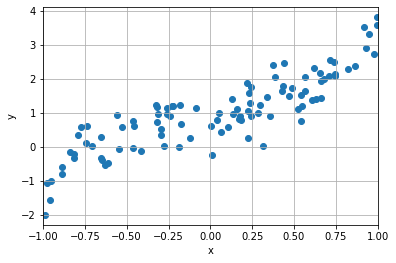

In [3]:
plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

From this plot, our goal is to build a model for $y \approx f(x)$.  

In this case, since we generated the data ourselves, we know that the "true" model is $y = f_0(x) + w$.    The code below superimposes the true model on the scatter plot.  Of course, with real-world data, we would not know the true model.  So we now see why synthetic data is useful when evaluating a learning algorithm:  you can run it on the data and compare the predicted targets to the true targets.  

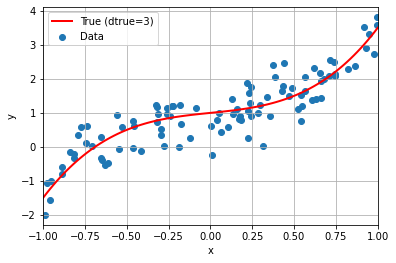

In [4]:
# Plot true function
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=2.0,label='True (dtrue=3)')

# Plot the scatter plot of the measured data
plt.scatter(xdat,ydat,label="Data")
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='best')
plt.show()

## Fit Model of Different Model Orders

First, suppose that you know the true model order `d=3` but you don't know the coefficients of the model.  The coefficients could be designed via linear regression using the linear regression methods in the `sklearn` package.  However, that would require us to construct a feature matrix by taking each value of `x` to powers up to `d`. Instead, we can do polynomial fitting directly via the the `polyfit` command.

Text(0, 0.5, 'y')

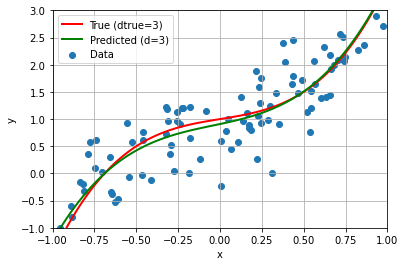

In [5]:
d = 3
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and prediction model
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=2,label='True (dtrue=3)')
plt.plot(xp,yp_hat,'g-',linewidth=2,label='Predicted (d=3)')

# Plot data
plt.scatter(xdat,ydat,label='Data')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

The plot above shows that, when `d` is known, the predicted model gives an excellent fit to the true noisless model $f_0(x)$ since we had sufficient training data.  

Now, in practice, the model order `d` is not known; it must be estimated.  

Let's investigate the effect of `d`.  First, see what happens when `d` is chosen too small, such as `d=1`.

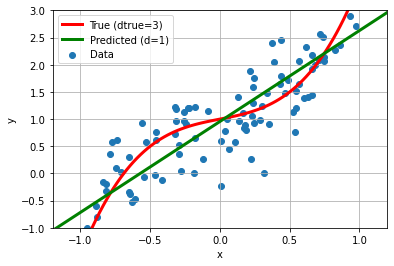

In [6]:
d = 1
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and prediction model
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3,label='True (dtrue=3)')
plt.plot(xp,yp_hat,'g-',linewidth=3,label='Predicted (d=1)')

# Plot data
plt.scatter(xdat,ydat,label='Data')
plt.legend(loc='best')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()


What we see is called *underfitting*.  The prediction model is not able to capture the full complexity of the relationship between $x$ and $y$.  

Next, let's see what happens when `d` is too large, such as `d=15`.

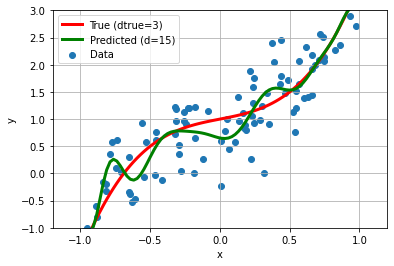

In [7]:
d = 15
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and prediction model
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1.2,1.2)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3,label='True (dtrue=3)')
plt.plot(xp,yp_hat,'g-',linewidth=3,label='Predicted (d=15)')

# Plot data
plt.scatter(xdat,ydat,label='Data')
plt.legend(loc='best')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

This is called *overfitting* and results is fitting the noise in the data and not the underlying relation $y=f(x)$.

When we compare the predicted model with the true model we can see the overfitting and underfittnig clearly.  But, in a real problem, we would not have access to the true function (otherwise, we wouldn't need to be learning it).  The question then is if we can determine the correct model order from data.  

One (bad) idea is for each model order to measure MSE on the training data and select $d$ that minimizes this MSE.  To do this, the code below loops over a model order `d = 1,2,...,14` and, for each model order, fits a model and measures the MSE. 

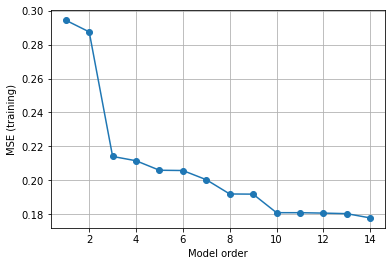

In [8]:
dtest = np.array(range(1,15))
MSEtr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xdat,ydat,d)
    
    # Measure MSE on training data
    yhat = poly.polyval(xdat,beta_hat)
    MSEd = np.mean((yhat-ydat)**2)
    MSEtr.append(MSEd)
    
plt.plot(dtest,MSEtr,'o-')
plt.xlabel('Model order')
plt.ylabel('MSE (training)')
plt.grid()
    

We see that minimizing the MSE on the training data doesn't work:  As we increase $d$, the MSE either decreases or stays the same.  So minimizing MSE on the training data leads to selecting a very high $d$, which in turn results in over-fitting.  How do we avoid this?

## Bias and Variance

To understand the tradeoffs in model order selection, we need to understand two key factors: *bias* and *variance*.  
Roughly speaking, *bias* measures whether the predictions match the true targets *on average*, and *variance* measures how far predictions tend to stray from their average values.  Together, they tell us how far the predictions tend to stray from the truth.  Averaging is needed to get around the fact that the noise and training data will vary from one experiment to another.  

In scalar regression, the goal is to predict a noisy test target $y$ given a test feaure $x$.  The prediction model is fitted to a dataset consisting of noisy $(x_i,y_i)$ training pairs.  Here, the training data and the training & testing noise cause random effects that we would like to average out.  In this context, the *bias* is defined as the *average* difference between the prediction $\hat{y}(x)$ and the true $y(x)$.  Mathematically, we write this as

> bias$(x) = E\{\hat{y}(x)-y(x) | x\}$

where $E\{.|x\}$ denotes "expectation conditioned on $x$", or the statistical average for fixed $x$.  Note that in taking this average, we hold the test feature $x$ fixed.
If bias$(x)=0$ for *every* $x$, then we say that the predictor is *unbiased*.

Bias tells us whether $\hat{y}(x)$ and $y(x)$ agree *on average*.  But the behavior of individual experiments can be quite far from their average!  So we would also like to know how far $\hat{y}(x)$ strays from its average value for that $x$, which is $\bar{y}(x) = E\{\hat{y}(x)|x\}$.  This latter quantity is described by the variance (or more precisely the variance conditioned on $x$).  Mathematically, this *variance* equals 

> var$(x) = E\{ ( \hat{y}(x) - \bar{y}(x) )^2 | x\}$

where again the test feature $x$ is held fixed when taking the expectation.

To illustrate bias and variance for polynomial regression, the code below repeatedly fits a least-squares polynomial model using noisy training data and predicts the test targets.  Each time, a different noisy training dataset is used, so that the polynomial coefficients turn out different.  The test target is then predicted for a grid of possible test features.  By averaging over 100 random experiments, we can do a good job of approximating the statistical expectations above.  (This is known as the "Monte Carlo" approximation.)

Everything described above is done for three different model orders: `d=1,3,14`.  

In [9]:
ntrial = 100    # Number of trials
dtest = [1,3,14]  # Model orders to test
nd = len(dtest)

nplot = 30 # size of test-feature grid
xp = np.linspace(-1,1,nplot) # test features
yp = poly.polyval(xp,beta) # noiseless test targets 

# initialize mean and std deviation vectors
yp_hat_mean = np.zeros((nplot,nd))
yp_hat_std  = np.zeros((nplot,nd))

# Loop over model orders
for j, d in enumerate(dtest):
    
    # initialize prediction matrix
    yp_hat = np.zeros((nplot,ntrial))

    # Loop over training experiments
    for it in range(ntrial):

        # Generate new training data
        xdat = rng.uniform(-1,1,nsamp)
        ydati = poly.polyval(xdat,beta) + rng.normal(0,wstd,nsamp)

        # Fit the model
        beta_hat = poly.polyfit(xdat,ydati,d)
        
        # Predict test targets
        yp_hat[:,it] = poly.polyval(xp,beta_hat)

    # Expectation and std deviation approximated using Monte-Carlo
    yp_hat_mean[:,j] = np.mean(yp_hat, axis=1)
    yp_hat_std[:,j] = np.std(yp_hat, axis=1)

Now we plot the results. The average true target $E\{y(x)|x\}$ is plotted in red, the average prediction $\bar{y}(x) = E\{\hat{y}(x)|x\}$ is plotted in green, and the gap between them shows the bias, since

> bias$(x) = E\{\hat{y}(x)-y(x) | x\} = E\{\hat{y}(x) | x\} - E\{y(x) | x\} = \bar{y}(x) - E\{y(x) | x\}$

In addition, the square-root of the variance var$(x)$ is plotted using green error bars.

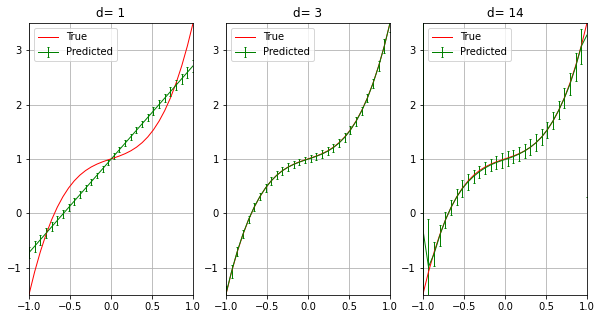

In [10]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=1,label='True')     
    plt.errorbar(xp,yp_hat_mean[:,j],fmt='g-',yerr=yp_hat_std[:,j],linewidth=1,capsize=1,label='Predicted')
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(loc='upper left')

Recall that the true model order is `dtrue=3`.  We see that there is no gap between $y(x)$ and $\bar{y}(x)$ when `d >= dtrue`, which means that the model is unbiased. In contrast, when `d < dtrue`, the model cannot capture the true function...even on average...and so the model is biased.

But, we also see that the variance increases with the model order `d`.  As the variance gets larger, the prediction tends to deviate more significantly from the truth on individual trials.

In general, selecting the model-order involves a tradeoff between bias and variance:
> Increasing the model order decreases bias but increases variance!

We want to strike the balance between bias and variance that minimizes the mean-squared test error.

## Using Cross-Validation

We know that training error cannot be used to choose a good model order: as the model gets more complex, the training error decreases or stays the same.

Instead, we should evaluate the performance of our trained model on samples that were *not* used in training.  The simplest way to do this is to split the original dataset into two parts, and use one for training and the other for testing.  We'll do that now using an equal number of samples for training and test.

In [11]:
xdat = rng.uniform(-1,1,nsamp)
y0 = poly.polyval(xdat,beta)
ydat = y0 + rng.normal(0,wstd,nsamp)

# Number of samples for training and test
ntr = nsamp // 2
nts = nsamp - ntr

# Training
xtr = xdat[:ntr]
ytr = ydat[:ntr]

# Test
xts = xdat[ntr:]
yts = ydat[ntr:]

Before we fit the data, let's plot the training and test samples separately.

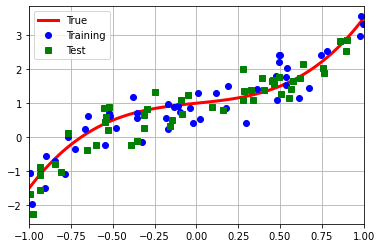

In [12]:
# Plot true function
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=3,label='True')

# Plot data
plt.plot(xtr,ytr,'bo',label='Training')
plt.plot(xts,yts,'gs',label='Test')
plt.grid()
plt.legend(loc='upper left')

Now we perform *cross-validation*:  For each model order $d$, we:

* Learn parameters $\hat{\beta}$ of order $d$ on the training data
* Predict the values on the test data
* Measure $MSE_{test}(d)$, the mean-squared prediction error on the test data.

Select $d$ that minimizes $MSE_{test}(d)$.

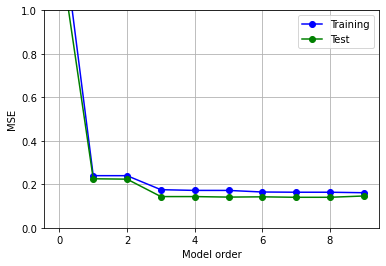

In [13]:
dtest = np.array(range(0,10))
MSEtest = []
MSEtr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xtr,ytr,d)
    
    # Measure MSE on training data
    # This is not necessary, but we do it just to show the training error
    yhat = poly.polyval(xtr,beta_hat)
    MSEd = np.mean((yhat-ytr)**2)
    MSEtr.append(MSEd)
    
    # Measure MSE on test data
    yhat = poly.polyval(xts,beta_hat)
    MSEd = np.mean((yhat-yts)**2)
    MSEtest.append(MSEd)
    
plt.plot(dtest,MSEtr,'bo-',label='Training')
plt.plot(dtest,MSEtest,'go-',label='Test')
plt.xlabel('Model order')
plt.ylabel('MSE')
plt.grid()
plt.ylim(0,1)
plt.legend(loc='best')
    

We select the model order from the minimum MSE on the test data

In [14]:
imin = np.argmin(MSEtest)
print("Estimated model order= {0:d}".format(dtest[imin]))


Estimated model order= 7


## K-Fold Validation

There are two potential problems with the simple training / test split in the past example.
* We were only able to use a small number of samples (20 out of 40) for training the model
* The particular model and model order selection depends heavily on the particular samples you chose for the training.

Both of these issues are particularly problematic for data sets with small numbers of samples.  An improvement is to use k-fold validation.  In k-fold validation, we split the data into $k$ parts, each part being approximately equal in size.  In the example below, we will use $k=10$.  For each split, we fit the data on $k-1$ parts and test the data on the remaining part. Then, we average the score over the $k$ parts.  

The `sklearn` package has many routines for this purpose.  We begin by importing the `model_selection` sub-package.

In [15]:
import  sklearn.model_selection 

Then, we run the model validation.  Note that $k$-fold validation can be computationally expensive since we need to iterate over all the folds, and for each fold, we need to iterate over all the model orders.

In [16]:
# Create a k-fold object
k = 10
kfo = sklearn.model_selection.KFold(n_splits=k,shuffle=True)

# Model orders to be tested
dtest = np.arange(0,10)
nd = len(dtest)

MSEts = np.zeros((nd,k))

# Loop over the folds
for isplit, Ind in enumerate(kfo.split(xdat)): # enumerate returns a counter (isplit) and a list (Ind)
        
    # Get the training data in the split
    Itr, Its = Ind 
    #kfo.split( ) produced Ind, which contains a pair of index sets for each fold 
    xtr = xdat[Itr]
    ytr = ydat[Itr]
    xts = xdat[Its]
    yts = ydat[Its]
    
    # Loop over the model order
    for it, d in enumerate(dtest):
    
        # Fit data on training data
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        # Measure MSE on test data
        yhat = poly.polyval(xts,beta_hat)
        MSEts[it,isplit] = np.mean((yhat-yts)**2)


Now, we compute the mean and standard error of the MSE over the folds for each model order.  The standard error is defined as the standard deviation divided by $\sqrt{k}$, where $k$ is the number of folds.  We use the unbiased estimate of the standard deviation, as implemented by the `ddof=1` option below. 

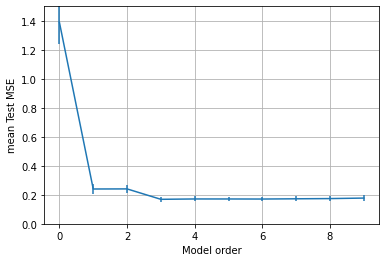

In [17]:
MSE_mean = np.mean(MSEts,axis=1) #note mean is taken over the second dimension, i.e. all folds for the same model order
MSE_se = np.std(MSEts,axis=1,ddof=1)/np.sqrt(k)
plt.errorbar(dtest, MSE_mean, yerr=MSE_se, fmt='-')
plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('mean Test MSE')
plt.grid()

Given these results, one method to select the model order is to use the model order that achieves the minimum mean MSE.  

In [18]:
imin = np.argmin(MSE_mean)
print("The selected model order is {0:d}".format(dtest[imin]))

The selected model order is 3


While this method may work in this data set, it sometimes selects a model order that is too high due to variance in the data.  A more conservative approach is the "one standard error" rule:
* Find the model order with the smallest `MSE_mean`
* Set `MSE_tgt` = minimum `MSE_mean` + one std error of the MSE at that minimum
* Find the lowest model order with `MSE < MSE_tgt`

This is illustrated in the following plot.

The estimated model order is 3


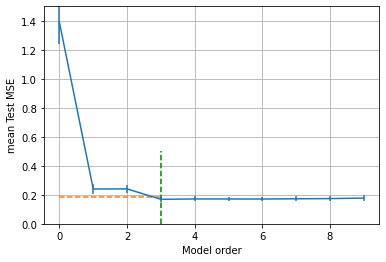

In [19]:
# Find the minimum MSE target
imin = np.argmin(MSE_mean)
MSE_tgt = MSE_mean[imin] + MSE_se[imin]

# Find the lowest model order below the target
I = np.where(MSE_mean <= MSE_tgt)[0]
iose = I[0]
dose = dtest[iose]

plt.errorbar(dtest, MSE_mean, yerr=MSE_se, fmt='-')

# Plot the line at the MSE target
plt.plot([dtest[0],dtest[imin]], [MSE_tgt, MSE_tgt], '--')

# Plot the line at the one-standard-error model estimate
plt.plot([dose,dose], [0,0.5], 'g--')

plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('mean Test MSE')
plt.grid()

# Print results
print("The estimated model order is %d" % dose)